# Cải thiện hình ảnh trong miền tần số (Image Enhancement in Frequency domain)

In [23]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

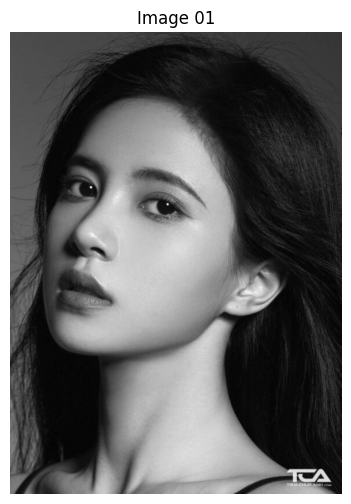

In [24]:
# Đường dẫn đến file ảnh
image_path = '/home/ubuntu_qa/codevs/Computer vision/Kien～先生/Cloud/Image01.jpg'

# Kiểm tra xem file có tồn tại hay không
if not os.path.exists(image_path):
    print(f"Lỗi: Không tìm thấy file tại đường dẫn {image_path}")
else:
    # Đọc ảnh gốc ở dạng grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Kiểm tra xem ảnh có được đọc thành công hay không
    if image is None:
        print("Lỗi: Không thể đọc được ảnh. Vui lòng kiểm tra file.")
    else:
        # Chuyển ảnh sang RGB để hiển thị với matplotlib
        image_rgb = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

        # Hiển thị ảnh
        plt.figure(figsize=(8, 6))
        plt.imshow(image_rgb)
        plt.title('Image 01')
        plt.axis('off')
        plt.show()

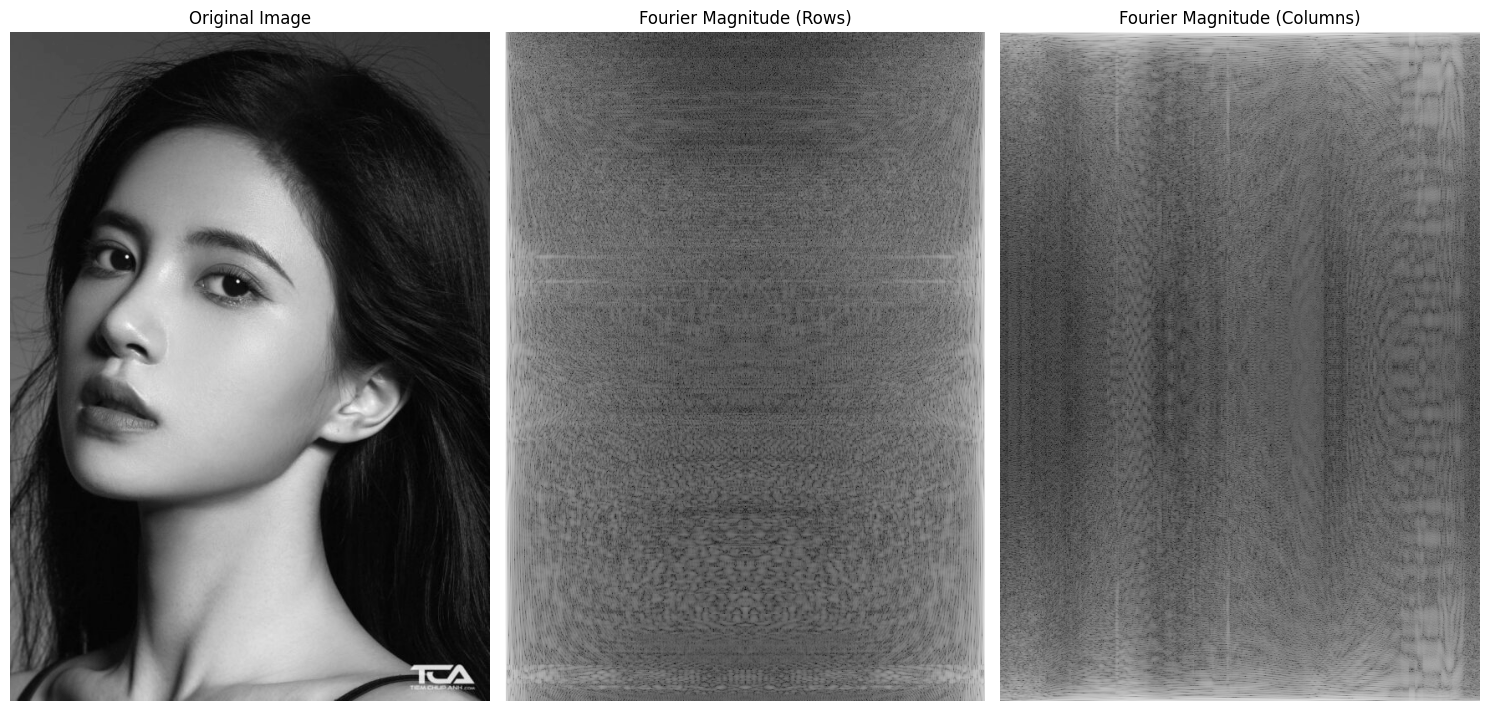

In [25]:


# Lấy chiều cao và chiều rộng của ảnh
height, width = image.shape

# Thực hiện biến đổi Fourier 1 chiều trên từng hàng
fourier_rows = np.fft.fft(image, axis=1)  # Biến đổi Fourier theo chiều ngang (hàng)
magnitude_rows = np.abs(fourier_rows)    # Lấy phổ biên độ

# Thực hiện biến đổi Fourier 1 chiều trên từng cột
fourier_cols = np.fft.fft(image, axis=0)  # Biến đổi Fourier theo chiều dọc (cột)
magnitude_cols = np.abs(fourier_cols)    # Lấy phổ biên độ

# Hiển thị ảnh gốc và kết quả
plt.figure(figsize=(15, 10))

# Ảnh gốc
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Phổ biên độ theo hàng
plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + magnitude_rows), cmap='gray')
plt.title('Fourier Magnitude (Rows)')
plt.axis('off')

# Phổ biên độ theo cột
plt.subplot(1, 3, 3)
plt.imshow(np.log(1 + magnitude_cols), cmap='gray')
plt.title('Fourier Magnitude (Columns)')
plt.axis('off')

plt.tight_layout()
plt.show()


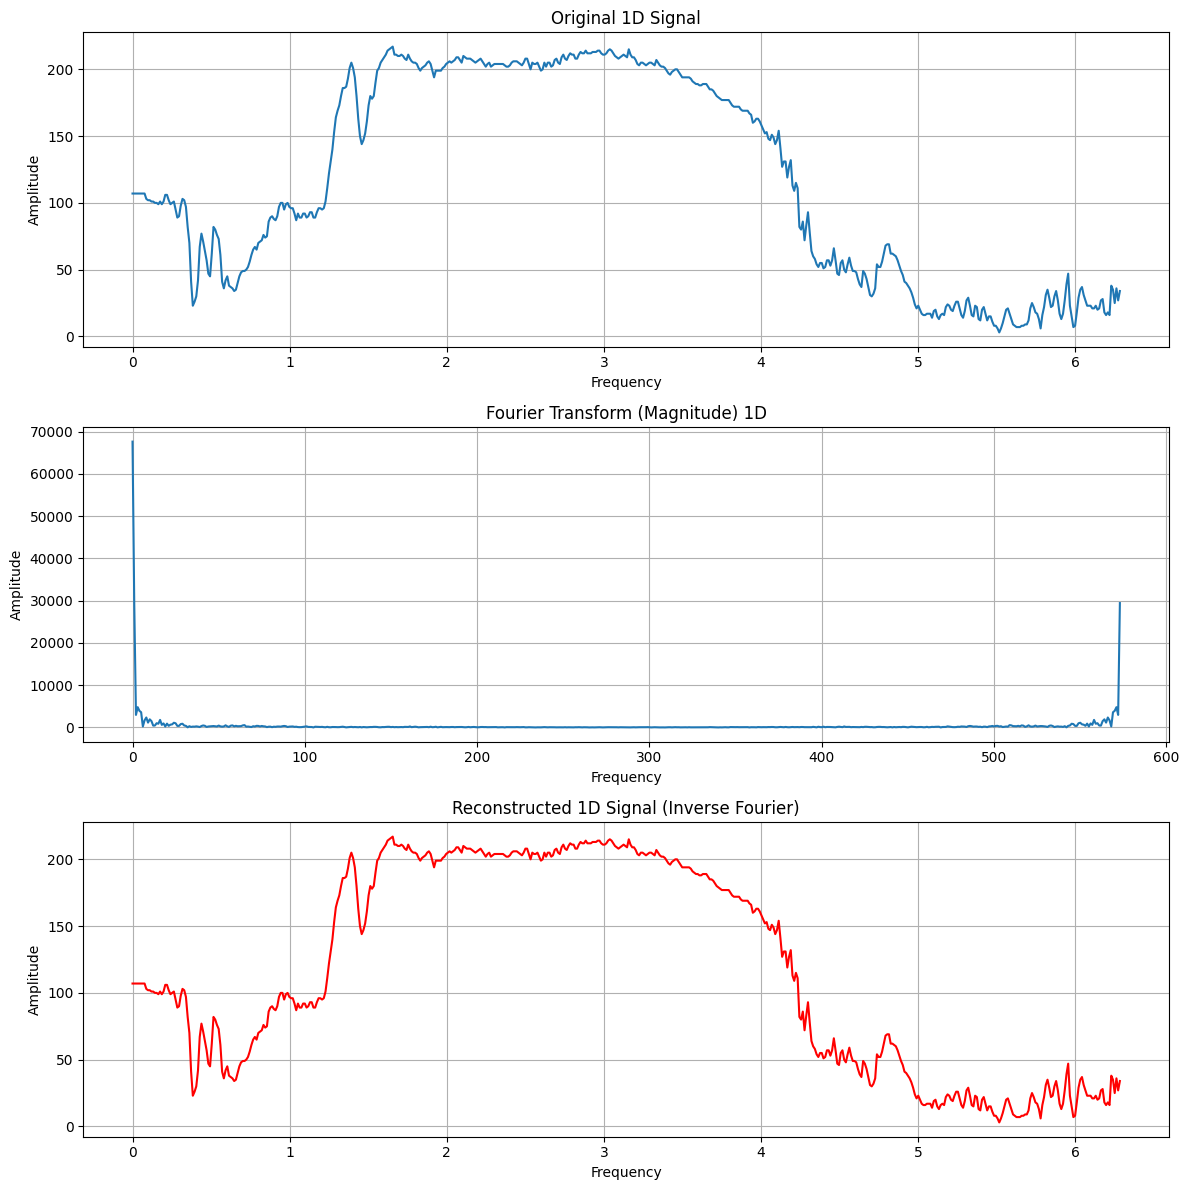

In [32]:
# 1. Biến đổi Fourier 1D (Trên mỗi hàng)
x = np.linspace(0, 2 * np.pi, image.shape[1])  # Dải giá trị từ 0 đến 2π
signal_1d = image[image.shape[0] // 2, :]  # Tín hiệu từ hàng giữa của hình ảnh

# Biến đổi Fourier 1D
fourier_transform_1d = np.fft.fft(signal_1d)
magnitude_1d = np.abs(fourier_transform_1d)  # Phổ biên độ
phase_1d = np.angle(fourier_transform_1d)   # Phổ pha

# Biến đổi ngược Fourier 1D
inverse_transform_1d = np.fft.ifft(fourier_transform_1d)

# Hiển thị kết quả
plt.figure(figsize=(12, 12))

# Tín hiệu gốc 1D
plt.subplot(3, 1, 1)
plt.plot(x, signal_1d, label="Original 1D Signal")
plt.title("Original 1D Signal")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.grid(True)

# Phổ biên độ 1D
plt.subplot(3, 1, 2)
plt.plot(magnitude_1d)  # Vẽ phổ biên độ sử dụng hàm plot()
plt.title("Fourier Transform (Magnitude) 1D")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.grid(True)

# Tín hiệu tái tạo từ Fourier ngược 1D
plt.subplot(3, 1, 3)
plt.plot(x, inverse_transform_1d.real, label="Reconstructed 1D Signal", color='r')
plt.title("Reconstructed 1D Signal (Inverse Fourier)")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()  # Điều chỉnh khoảng cách giữa các đồ thị
plt.show()

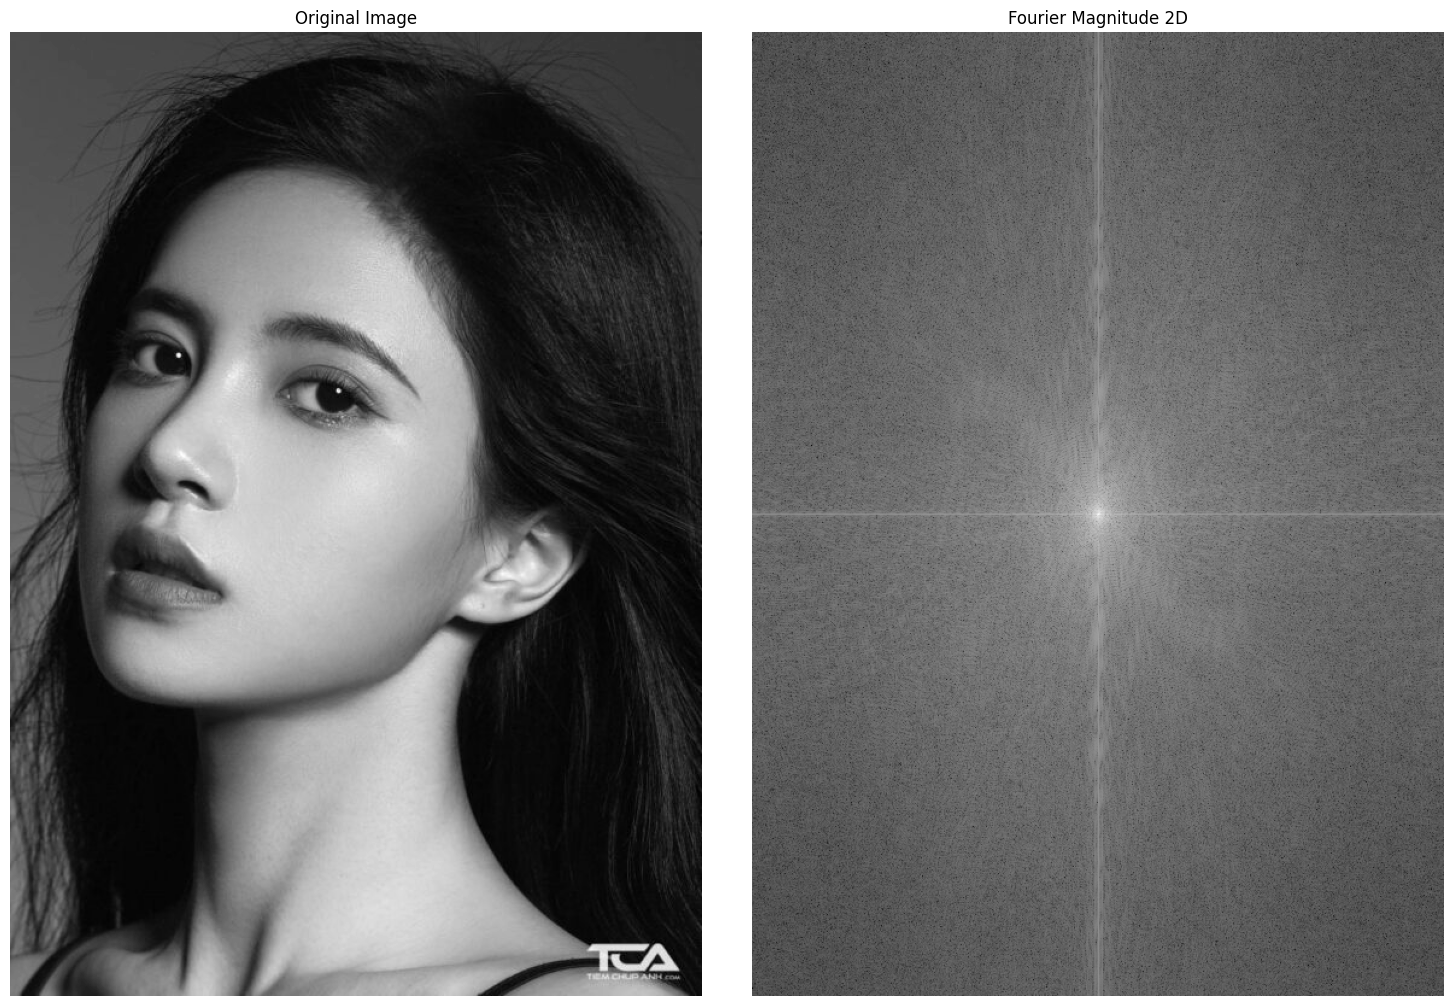

In [27]:
# Kích thước ảnh
height, width = image.shape

# **Fourier Transform 2D:**
fourier_2d = np.fft.fft2(image)              # Biến đổi Fourier 2D
fourier_2d_shift = np.fft.fftshift(fourier_2d)  # Dịch tâm phổ tần số về giữa
magnitude_2d = np.abs(fourier_2d_shift)     # Lấy phổ biên độ

# Hiển thị ảnh gốc và các kết quả
plt.figure(figsize=(15, 10))

# Ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Phổ biên độ Fourier 2D
plt.subplot(1, 2, 2)
plt.imshow(np.log(1 + magnitude_2d), cmap='gray')
plt.title('Fourier Magnitude 2D')
plt.axis('off')

plt.tight_layout()
plt.show()
